# Análises basicas
* **Tipos de analises**
  * A1: Potência média durante a ponta (18:00 as 20:00)
  * A2: Potencia máxima do dia
  * A3: horario do dia com maior consumo 
  * A4: fator de proporção noturna: media (noite)/media(aula)
  * A5: fator de carga: media/máxima
* **Escolha dos dados**
  * Dados de 2018 do campus florianópolis, com médias de 5 minutos
  * Consideraremos apenas os dias úteis
  * Para visualizar os resultados, escolhimos o mes de março
  * Ruidos: dia 2, 9, 16, 23 (feriado), 30 (feriado)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
raw = pd.read_csv ("potencias_2018.csv", header=0)

raw['date'] = pd.to_datetime (raw['data'])
raw = raw.set_index(raw.date)
raw = pd.DataFrame (raw['pa'] + raw['pb']+ raw['pc'], columns=['P'])
raw

,P
date,
2018-01-01 00:00:00,70.005337
2018-01-01 00:05:00,68.660572
2018-01-01 00:10:00,66.789727
2018-01-01 00:15:00,71.042258
2018-01-01 00:20:00,72.451916
2018-01-01 00:25:00,68.264741
2018-01-01 00:30:00,67.467998
2018-01-01 00:35:00,66.206372
2018-01-01 00:40:00,67.443518


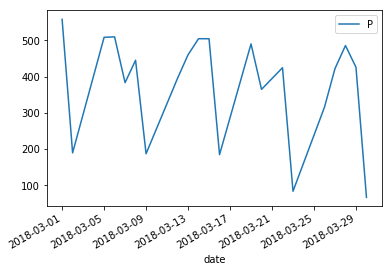

In [29]:
## ANÁLISE 1: Potência média durante a ponta (18:00 as 20:00)
A1 = raw.between_time('18:00:00', '19:59:59').resample('B').mean()
A1 = A1.dropna()
A1['2018-03-01' : '2018-04-01'].plot()

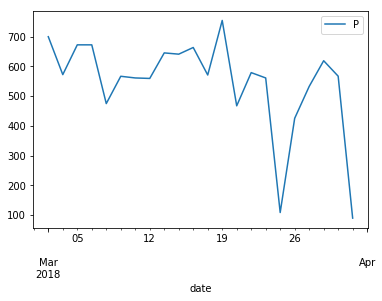

In [30]:
## ANÁLISE 2: Potencia máxima do dia
A2 = raw.resample('B').max()
A2 = A2.dropna()
A2['2018-03-01' : '2018-04-01'].plot()

In [77]:
## ANÁLISE 3: horario do dia com maior consumo
import datetime as dt

A3 = raw.resample('B').apply (lambda df: df.idxmax())
A3['P'].dt.time

date
2018-01-01    22:15:00
2018-01-02    09:45:00
2018-01-03    08:30:00
2018-01-04    12:45:00
2018-01-05    09:35:00
2018-01-08    08:50:00
2018-01-09    10:35:00
2018-01-10    09:00:00
2018-01-11    10:50:00
2018-01-12    12:20:00
2018-01-15    09:15:00
2018-01-16    11:10:00
2018-01-17    11:05:00
2018-01-18    09:05:00
2018-01-19    10:00:00
2018-01-22    10:05:00
2018-01-23    09:40:00
2018-01-24    10:55:00
2018-01-25    09:50:00
2018-01-26    09:50:00
2018-01-29    10:30:00
2018-01-30    10:35:00
2018-01-31    10:20:00
2018-02-01    10:45:00
2018-02-02    12:00:00
2018-02-05    14:55:00
2018-02-06    13:45:00
2018-02-07    15:30:00
2018-02-08    15:05:00
2018-02-09    13:00:00
                ...   
2018-11-20    16:15:00
2018-11-21    16:30:00
2018-11-22    18:45:00
2018-11-23    16:05:00
2018-11-26    16:20:00
2018-11-27    14:45:00
2018-11-28    14:35:00
2018-11-29    16:15:00
2018-11-30    14:40:00
2018-12-03    15:45:00
2018-12-04    15:55:00
2018-12-05    14:15:00
2018-1

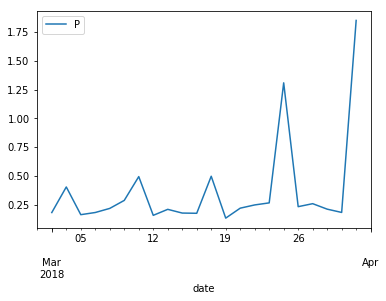

In [32]:
## ANÁLISE 4: fator de proporção noturna: media (noite)/media(aula)
A4 = raw.between_time('00:00:00', '05:00:00').resample('B').mean()/raw.between_time('07:30:00', '11:30:00').resample('B').mean()
A4 = A4.dropna()
A4['2018-03-01' : '2018-04-01'].plot()

In [38]:
## ANÁLISE 5: fator de carga: media/máxima
A5 = raw.resample('B').mean()/raw.resample('B').max()
A5 = A5.dropna()
A5['2018-03-01' : '2018-04-01']

,P
date,
2018-03-01,0.487920
2018-03-02,0.247701
2018-03-05,0.485840
2018-03-06,0.491536
2018-03-07,0.540147
2018-03-08,0.451362
2018-03-09,0.224998
2018-03-12,0.530286
2018-03-13,0.456394
